In [1]:
#Importing all the necessary libraries at the beginning

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Reading the dataset
df = pd.read_csv('Twitch_user_data.csv')

In [3]:
#Displaying the first 10 rows of the dataset for an overview

df.head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


Understanding the columns of the given DataSet:-
    
    Channel :- The name of the Twitch Channel which is present in the dataset.
    
    Watch Time :- It refers to the total number of minutes that the channel's videos have been watched till date.
    
    Stream Time :- The total number of minutes that the channel has gone  streaming the content
    
    Peak Viewers :- The highest number of people who watched the video 
    
    Average Viewers :- The verage number of viewers of a prticular channel
    
    Followers:- Total number of followers of a given channel
    
    Followers Gained :- The number of followers increased of a channel over a period of time.
    
    Views Gained :- The increase in number of views of videos of a particular channel over a period of time.
    
    Partenered :- Specifies if the channel has collaborated with another channel in a video.
    
    Mature :- Specifies if the content in the channel is for adults or children.
    
    Language :- Specifies the language in which the channel operates primarily.

In [4]:
#Checking for any null values or missing values in the dataset
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [5]:
#Checking for any duplicated entries before proceeding further.
df.duplicated().sum()

0

# Proceeding with Exploratory Data Analysis 

In [6]:
#Finding the shape of the dataset
df.shape

(1000, 11)

In [7]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


Direct Inferences which can be obtained from this particular describe function are as follows:-

1. The maximum stream time by a channel is 521445 minutes which is approximately equal to 362 days. This means that the total content streamed by a channel would take 362 days to fully watch it. Really Astonishing

2. We can clearly see a large increase in almost all the columns between minimum and maximum values so the dataset is quite diverse and a chunk of these points may be outliers.



## Now, lets dive deeper into the analysis of each column to see what we can expect

In [8]:
#Now, lets take the Watch Time column

df['Watch time(Minutes)']

0      6196161750
1      6091677300
2      5644590915
3      3970318140
4      3671000070
          ...    
995     122524635
996     122523705
997     122452320
998     122311065
999     122192850
Name: Watch time(Minutes), Length: 1000, dtype: int64

Now, lets try to see if the watch time has anything to do with language of the channels and the reach of the channel after that

In [9]:
df['Language'].value_counts()


English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Swedish         1
Slovak          1
Finnish         1
Greek           1
Other           1
Name: Language, dtype: int64

Now, lets add up all the channels whose language count is less than 10 as Others for better analysis

In [10]:
lan = {'English':'English','Korean':'Korean','Russian':'Russian','Spanish':'Spanish','French':'French',
      'Portugese':'Portugese','German':'German','Chinese':'Chinese','Turkish':'Turkish','Italian':'Italain',
      'Polish':'Polish','Thai':'Thai','Japanese':'Japanese','Czech':'Others','Arabic':'Others','Hungarian':'Others',
      'Other':'Others','Slovak':'Others','Finnish':'Others','Swedish':'Others','Greek':'Others'}

In [11]:
df.loc[:,'Language'] = df.loc[:,'Language'].map(lan)
df['Language'].value_counts()

English     485
Korean       77
Russian      74
Spanish      68
French       66
German       49
Chinese      30
Turkish      22
Others       18
Italain      17
Polish       12
Thai         11
Japanese     10
Name: Language, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

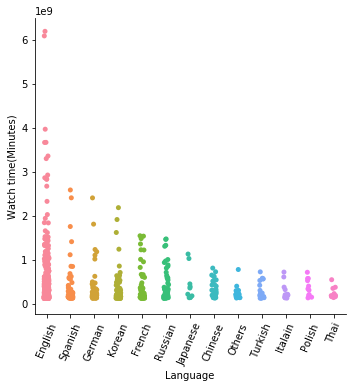

In [12]:
sns.catplot(x='Language',y='Watch time(Minutes)',data=df)
plt.xticks(rotation=67)

We can clearly see that due to the sheer number of channels for English Language, the watch time of the language too is really good as it is the most popular language.

On contrary to that, even though there are as many as 77 Korean channels, it falls in 4th place of highest watch time despite having the second largest number of channels

Spanish and German came 2nd and 3rd in the highest watch time for a channel even though a majority of their channels have lesser watch time than a select few at the top

Russian even though having 70 plus channels as a language, its watch time is quite less compared to others in its range.

Now let us compare the above plot with the plot between Language of Channels and Stream Time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

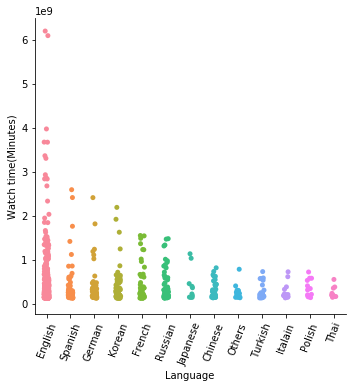

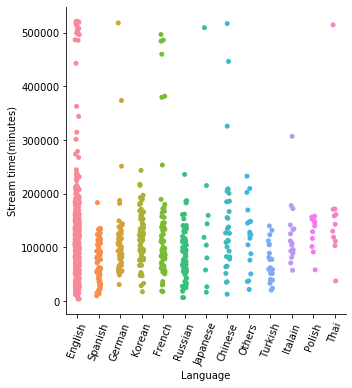

In [15]:
sns.catplot(ax=axes[0], x='Language', y='Watch time(Minutes)',data=df)
plt.xticks(rotation=69)
sns.catplot(ax=axes[1], x='Language', y='Stream time(minutes)',data=df)
plt.xticks(rotation=69)

We can observe that in english language, the watch time is almost closely correlated with stream time. The more the stream time, the more the watch time.

But in Thai Language, we can clearly observe that even if multiple Thai channels have different stream time, their watch times are almost identical or close to each other. This can imply that the viewers of these particluar channels are limited in number

Even though the stream time of Korean Channels are quite varying, except for some channels, the watch time is almost close to one another. We can assume that the 3 or 4 channels with higher watch time are the most popular ones.



Now, lets try to plot between watch time and followers to see if more watch time means more followers and compare them with different languages.

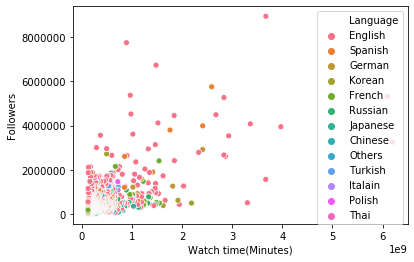

In [16]:
sns.scatterplot(x='Watch time(Minutes)',y='Followers',data=df,hue='Language')

Let us look at few of the most popular languages to see if their watch times and followers are correlated. 

I'm taking English, Korean and Japanese as example.

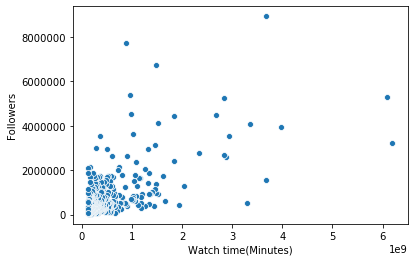

In [17]:
sns.scatterplot(x=df[df['Language']=='English']['Watch time(Minutes)'],y=df[df['Language']=='English']['Followers'],data=df)

Inferences:-
    
1. Its hard to visualise the impact of English language on Watch time and Followers but we saw earlier in other plots that it has the largest watch time of all languages and even in this plot compared to the previous plot, we can see a large portion of graph is English itself. But we can be sure that English has the biggest impact in all languages.

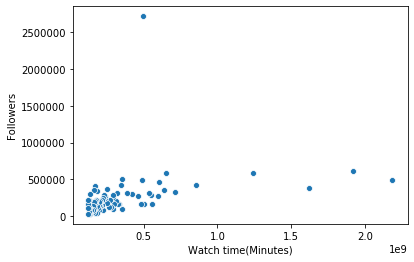

In [18]:
sns.scatterplot(x=df[df['Language']=='Korean']['Watch time(Minutes)'],y=df[df['Language']=='Korean']['Followers'],data=df)

Inferences:- 

This plot has some interesting characterstics which are quite obvious after seeing the plot. A major cluster of the total 77 odd channels have their total watch time under 0.5le9 minutes which a few exceeded that watch time. As the watch time increased, we can see a small growth in followers too barring 2 anamolies.

One particluar channel, even though has watch time in the range of 0.5 to 1 like others, had the followers count more than any other channel while the channel having watch time more than 2 has less followers. Lets take a look at these channels to see if we can find something.

In [28]:
df[(df['Followers']>2500000) & (df['Language']=='Korean')]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
219,Faker,492835710,17115,56325,29414,2716270,750480,26508938,True,False,Korean


As we can see, even though the stream time of this channel is not so high and considering his average and peak viewers are also not so high, the watch time of his videos are significantly higher along with his followers. We can also see that he has partnered with other collaborator(who most probably is popular) which could also be a reason for his exponential growth.

In [33]:
df.iloc[17:18,:]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
17,풍월량 (hanryang1125),2186662470,181230,26999,12201,494445,92205,34405975,True,False,Korean


This is a complete contrast to what we had observed in the previous channel. This channel has the highest watch time of all channels that are Korean yet, his followers are a bit less compared to other channels near his radar. His stream time is almost 10times more than the top korean channel and his videos are being watched many times but his followers count is significantly less. If we could have also had the information on who they collaborated with, we could have analysed a bit more on why his content is less appreciated.

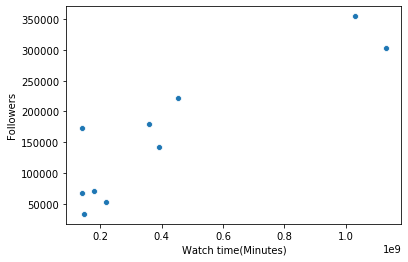

In [34]:
sns.scatterplot(x=df[df['Language']=='Japanese']['Watch time(Minutes)'],y=df[df['Language']=='Japanese']['Followers'],data=df)

The Japanese channels seem stable with respect to the number of followers they have based on their watch time of their videos. We can clearly see a linear increase in the number of followers which is exactly how a channels growth should be. More the content, more the followers

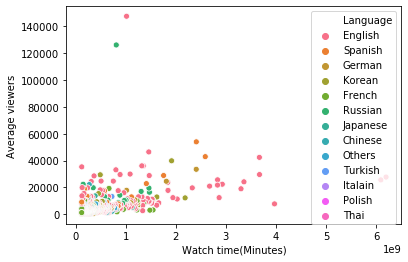

In [42]:
sns.scatterplot(x='Watch time(Minutes)',y='Average viewers',data=df,hue='Language')

From this, we can observe that

1. Even though as watch time increases, except for a few anamolies here and there, the average viewers increases ever so slightly.
2. As watch time increases, peak viewers also increased suggesting that more number of people like longer length videos.

In [43]:
corr = df.corr()
corr['Watch time(Minutes)'].sort_values(ascending=False)

Watch time(Minutes)     1.000000
Followers               0.620234
Peak viewers            0.582797
Views gained            0.529862
Followers gained        0.514648
Average viewers         0.476165
Stream time(minutes)    0.150588
Partnered               0.038258
Mature                 -0.043197
Name: Watch time(Minutes), dtype: float64

### We can observe that Peak viewers has a correlation of 58% with watch time while Average Viewers has correlation of 47%

### Now lets move on to Stream Time and analyse it with various other columns

In [35]:
df['Stream time(minutes)']

0      215250
1      211845
2      515280
3      517740
4      123660
        ...  
995     13560
996    153000
997    217410
998    104745
999     99180
Name: Stream time(minutes), Length: 1000, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

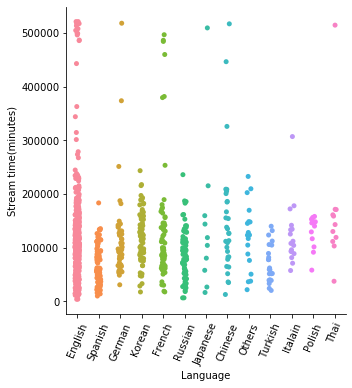

In [37]:
sns.catplot(x='Language',y='Stream time(minutes)',data=df)
plt.xticks(rotation=67)

Inferences:- 

1. This plot is more equally distributed than the Watch time column against other languages. We can clearly see that the stream time in all languages are kinda equally spread from 0 to 200000 minutes. From there, there are really few channels whose stream time has exceeded 200000 minutes. 

2. Japanese channels are the most striking ones because of the fact that there are a very few channels in th language and none of their stream time is not overlapping in the least.

3. English has the most number of channels which has their stream time more than 500000 minutes while 4 other languages have one channel exceeding 500000 minutes stream time (It will be interesting to see their reach compared to similar english channels)

Lets move on now.

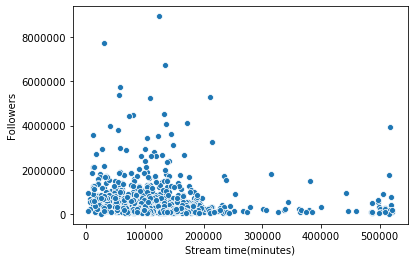

In [41]:
#Let's plot stream time against followers in general and then dive deeper into language and mature

sns.scatterplot(x='Stream time(minutes)',y='Followers',data=df)

Inferences:-

By the first look at the plot, we can't clearly come to any conclusive inferences but we can always make assumptions and prove them later. Also, the fact that this plot is for all languages and all the 1000 channles combined makes it hard to visualise.

We can make an assumption that the correlation between Followers and Stream Time is really less atleast when accounting for all languages combined.

We can assume that more Stream Time usually means less followers,since we can see from the plot that from 200000 minutes of Stream Time, the followers decreased slightly which could probably mean slight negative correlation. We can check this soon. 

The point that seemed like a outlier to me is the point which represnts almost 8000000 followers but the stream time is in between 0 to 100000 stream time because the other channels in this range usually have 4 times less followers than this particluar channel.

Lets compare this channel with a similar channel to see if we can find any interesting information at the end

In [50]:
corr = df.corr()
corr['Stream time(minutes)'].sort_values()

Average viewers        -0.249248
Followers gained       -0.158165
Peak viewers           -0.119540
Followers              -0.091299
Partnered              -0.007073
Mature                  0.044978
Views gained            0.064370
Watch time(Minutes)     0.150588
Stream time(minutes)    1.000000
Name: Stream time(minutes), dtype: float64

We can clearly see that the Stream Time overall is slightly negatively correlated with number of followers as a whole.

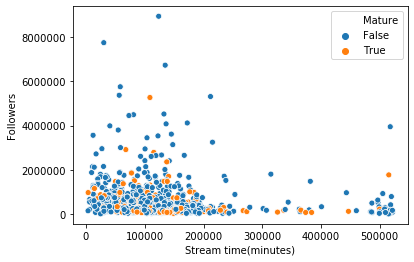

In [46]:
#Let's check if maturity of the channel has any role to play in the number of followers as a wole

sns.scatterplot(x='Stream time(minutes)',y='Followers',data=df,hue='Mature')

Inferences :-

From, the first look at the plot, we can clearly see that there are clearly more non mature channels compared to the mature channels which might push the correlation in favor of the non mature channels.

One mature channel stood out from the rest of the ones in which the Stream Time is just above 100000 minutes and their followers are more than 5000000 which is quite impressive compared to the others in its range.

Let's check it out

In [47]:
df[(df['Mature']==True) & (df['Followers']>4000000)]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
10,TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,True,True,English


This English channel named TimTheTatman is the most popular mature channel out there. It has a fairly impressive Watch Time of 2834436990 minutes with 5265659 people following his account. The amount of Followers and Views Gained is quite good and if we assume if these columns mean that the followers and views are gained in a span of time, then its most definetely possible that it was partnered not long ago.

Now, let's once again take the languages of Korean,English and Japanese to see how the Stream Time affects the followers based on these specific languages

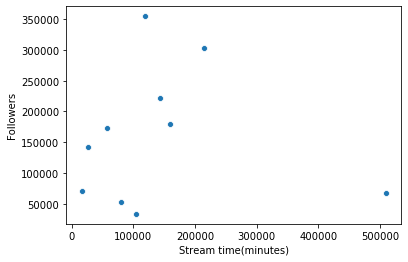

In [49]:
sns.scatterplot(x=df[df['Language']=='Japanese']['Stream time(minutes)'],y=df[df['Language']=='Japanese']['Followers'],data=df)

Inferences :-
    
Since, there are quite less number of channels in Japnese, we can clearly see the contrast between each channel which is not possible for English.

As a whole, we can see that the Stream Time is slightly less negatively correlated in the case of Japanese language wherein as the Stream Time increases, the number of followers increased too (except for some outliers) which is quite opposite to the negative correlation displayed as a whole.

In [52]:
corr=df[df['Language']=='Japanese'].corr()
corr['Stream time(minutes)'].sort_values(ascending=False)

Stream time(minutes)    1.000000
Followers gained        0.081743
Watch time(Minutes)     0.028606
Followers              -0.028796
Views gained           -0.044267
Average viewers        -0.513841
Peak viewers           -0.573185
Partnered                    NaN
Mature                       NaN
Name: Stream time(minutes), dtype: float64

We can see that the Stream Time has -2% negative correlation with Followers in Japanese compared to the -10% correlation overall.

Lets see the plot with Maturity as a hue to find some insights.

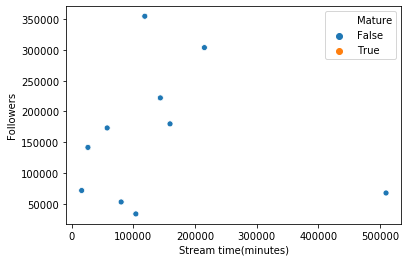

In [53]:
sns.scatterplot(x=df[df['Language']=='Japanese']['Stream time(minutes)'],y=df[df['Language']=='Japanese']['Followers'],data=df,hue='Mature')

Surprise....No channel in japanese language has mature content which is quite rare these days.

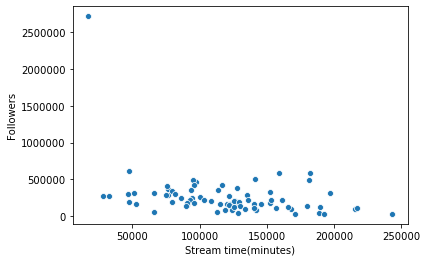

In [54]:
sns.scatterplot(x=df[df['Language']=='Korean']['Stream time(minutes)'],y=df[df['Language']=='Korean']['Followers'],data=df)

This....is a rather interesting plot. Lets dive deeper into this plot to see what we can find.

The first thing we observe is that there is one extreme outlier point whose Stream Time is quite less compared to all other channels but it has the highest number of followers which doesn't sound quite good.This might be the case of a celebrity posting less content but has highest followers.

Coming to the rest of the plot, we can see that there's almost 0 correlation as the number of followers are being constant irrespective of the Stream Time ranging from 0 to highest value. Infact, the highest Stream Time channel has the lowest number of followers. Really Strange

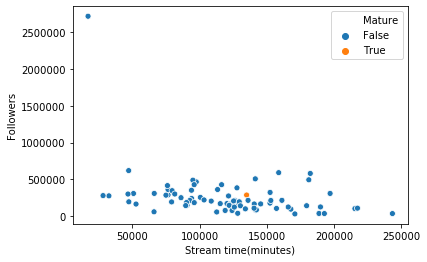

In [55]:
sns.scatterplot(x=df[df['Language']=='Korean']['Stream time(minutes)'],y=df[df['Language']=='Korean']['Followers'],data=df,hue='Mature')

Not enough leads when we consider the Maturity of the channel videos so lets try to plot partenered based on the plot to see if we can find something.

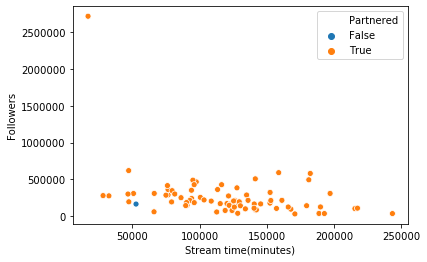

In [56]:
sns.scatterplot(x=df[df['Language']=='Korean']['Stream time(minutes)'],y=df[df['Language']=='Korean']['Followers'],data=df,hue='Partnered')

Oof, theese Korean Channels are really a mystery to me. Only one channel has not been partnered and its Stream Time and Followers are quiteless too.

Now lets explore that one particluar anamoly which stood out from all the others.

In [57]:
df[(df['Language']=='Korean') & (df['Followers']>2500000)]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
219,Faker,492835710,17115,56325,29414,2716270,750480,26508938,True,False,Korean


This particular channel named Faker has quite an impressive amount of Watch Time while his Stream Time is really less compared to others. (Maybe his gameplay style is too good than others?)

### Now lets move on to the followers column to analyse it before moving on to creating a target column and making some predictions

In [58]:
df['Followers']

0      3246298
1      5310163
2      1767635
3      3944850
4      8938903
        ...   
995     601927
996     213212
997     109068
998     547446
999     178553
Name: Followers, Length: 1000, dtype: int64

Now, lets try and see if the followers have anything to do with Langauge of the Channel

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

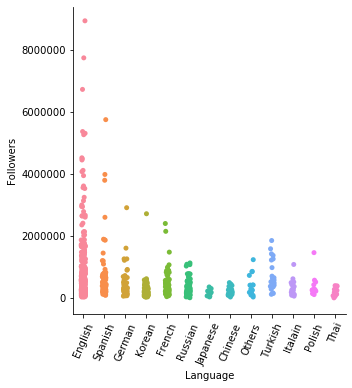

In [61]:
sns.catplot(x='Language',y='Followers',data=df)
plt.xticks(rotation=67)

Inferences :-

As usual, English reigns on top yet again with most number of followers for a channel and alos the wide distribution of number of followers for many channels followed by Spanish and German

Korean, as we saw, has most of the channels concentrated at a single range of followers while one channel stood out far too beyond the others. Japanese has the least amount of followers compared to other languages followed by Thai. I always assumed that Japanese were good at gaming and have quite some followers but boy was I proven wrong.


    

## Now lets move onto Outlier detection and Cleaning after which we can create a target column 

Here, I used one of the most common methods to remove outliers which is called IQR Score or InterQuartile Range Score to detect and remove outliers.

In this, we define 2 Quartiles which are at 25% and 75% of the values of the data as Quartile 1 and Quartile 2. Next we obtain the InterQuartile Range or iqr by subtracting these two quartiles followed by calculating the lower and upper bounds by using a formula.

Once we get a hold of the Lower Bound and Upper Bound values, any data point which is less than the Lower bound and higher than the Upper Bound is an outlier so we remove them to balance the data

Let us first make the Mature and Partnered Columns into integer column

In [63]:
df[['Mature','Partnered']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Mature     1000 non-null   bool 
 1   Partnered  1000 non-null   bool 
dtypes: bool(2)
memory usage: 2.1 KB


In [75]:
m = {True:1,False:0}
p = {True:1,False:0}
df['Mature'] = df['Mature'].map(m)
df['Partnered'] = df['Partnered'].map(m)
df[['Mature','Partnered']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Mature     1000 non-null   int64
 1   Partnered  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


Now, let us assign the values to each language based on their overall importance. Ill be considering Stream Time, Followers and Views Gained as my parameters

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

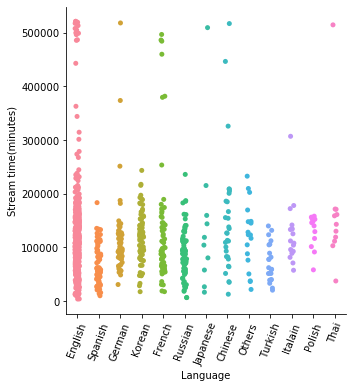

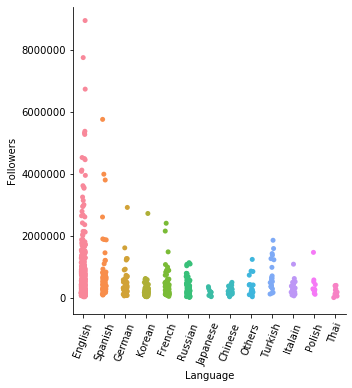

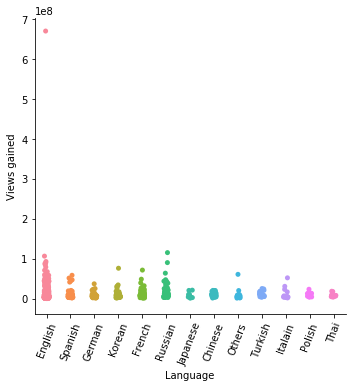

In [82]:
sns.catplot(ax=axes[0], x='Language', y='Stream time(minutes)',data=df)
plt.xticks(rotation=69)
sns.catplot(ax=axes[1], x='Language', y='Followers',data=df)
plt.xticks(rotation=69)
sns.catplot(ax=axes[2], x='Language', y='Views gained',data=df)
plt.xticks(rotation=69)

In [83]:
lan1 = {'English':13,'German':12,'Spanish':11,'Korean':10,'Russian':8,'French':9,'Chinese':7,'Japanese':6,'Others':5,'Italian':4,'Turkish':3,'Polish':2,'Thai':1}

In [84]:
df['Language'] = df['Language'].map(lan1)
df['Language'].value_counts()

13.0    485
10.0     77
8.0      74
11.0     68
9.0      66
12.0     49
7.0      30
3.0      22
5.0      18
2.0      12
1.0      11
6.0      10
Name: Language, dtype: int64

In [88]:
dfx = df.drop(['Channel'],axis=1)

In [92]:
def rem_outliers(df,col,outlier):
    q1,q2=np.percentile(col,[25,75])
    iqr = q2-q1
    lb = q1 - 1.5*iqr
    ub = q2 + 1.5*iqr
    for i in range(len(col)):
        if(col[i]>ub or col[i]<lb):
            if df.index[i] not in outlier:
                outlier.append(df.index[i])

As we can see, we used the numpy percentile function to calculate the lower and upper bounds of the column and then proceeded to find the Upper and Lower bound of the column using the above formula

In [94]:
outlier = []
for col in df.columns:
    if col != 'Channel':
        rem_outliers(df,df[col],outlier)

In [96]:
len(outlier)

475

In [97]:
#Obtaining the new dataframe free of outliers

newdf = df.drop(outlier,axis=0,errors='ignore')
newdf.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
110,uzra,812362125,208785,14181,3683,185506,29752,20715640,1,0,7.0
112,Thijs,794621265,108720,24923,7180,755116,68557,15548337,1,0,13.0
122,Elajjaz,726000045,145755,13080,4922,346566,37883,12800182,1,0,13.0
124,POW3Rtv,721548885,177885,69009,3836,1080764,495072,23271722,1,0,NaN
127,따효니 (ddahyoni),711864630,152445,17253,4534,322895,46946,15586820,1,0,10.0


In [100]:
newdf.isnull().sum()

Channel                  0
Watch time(Minutes)      0
Stream time(minutes)     0
Peak viewers             0
Average viewers          0
Followers                0
Followers gained         0
Views gained             0
Partnered                0
Mature                   0
Language                41
dtype: int64

In [101]:
#Since we already dealt with the outliers and importance of language, Ill be dropping the language column for the predictions
df1 = newdf.drop(['Language'],axis=1)

# Creating the Target Column

Since the target column is not given in this particular dataset, I am gonna assume the target column as 'Followers' which basically predicts how many followers that a channel might posess

For this, I am going to consider six columns which i think are the most important features in the dataset.
1. Stream Time(Minutes)
2. Watch Time(Minutes)
3. Followers Gained
4. Views Gained
5. Partnered
6. Mature

So now, lets get started

In [106]:
traindf = df1.drop(columns=['Peak viewers','Average viewers','Channel'],axis=1)
traindf.head()

,Watch time(Minutes),Stream time(minutes),Followers,Followers gained,Views gained,Partnered,Mature
110,812362125,208785,185506,29752,20715640,1,0
112,794621265,108720,755116,68557,15548337,1,0
122,726000045,145755,346566,37883,12800182,1,0
124,721548885,177885,1080764,495072,23271722,1,0
127,711864630,152445,322895,46946,15586820,1,0


In [108]:
#Importing the necessary libraries for preprocessing and  model building

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [109]:
X_train,X_test,y_train,y_test = train_test_split(traindf.drop(['Followers'],axis=1),traindf['Followers'],test_size=0.25,random_state=42)

In [110]:
#Fitting the data and transforming it as the columns have significant difference in their values

s =StandardScaler()
s.fit(X_train)
X_train = s.transform(X_train)
X_test  = s.transform(X_test)

In [113]:
#Importing Linear regression and creating an instance of it

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [114]:
lr.fit(X_train,y_train)
predic = lr.predict(X_test)

In [116]:
#Viewing the predictions of followers of different channels

predic

array([319235.80540489, 253845.67316473, 759997.44758934, 318205.39332663,
       475930.65022784, 342429.86154144, 183439.27270172, 137794.13622923,
       300524.68757018, 547924.76627077, 487331.53404292, 170024.64118513,
       624549.60557606, 208610.96022988, 351268.32807673, 217053.31612501,
       471190.728742  , 718874.46969601, 208936.83600037, 287747.44090264,
       166544.9605859 , 755069.37520173, 347690.15259203, 136160.32494253,
       215291.27693307, 314745.34047385, 219293.2142621 , 362104.7413658 ,
       347695.58637949, 194571.0493932 , 127063.03939633, 356605.92740649,
       249607.94686472, 178196.90142934, 700401.90128256, 310688.95730672,
       238516.86396647, 572433.42225609, 562546.15547181, 356508.59602394,
       527201.12563071, 259924.48209286, 674922.454833  , 370579.74430177,
       165506.96551268, 319184.74062811, 541981.07148591, 220957.79746771,
       344091.25755655, 515990.42101263, 186089.0601995 , 489905.1098518 ,
       211020.7136291 , 5

In [117]:
#Checking the accuracy of the predictions

print(r2_score(y_test,predic))

0.4123514367073179


Even though the accuracy is actually low, the primary aim of this notebook was to get acquainted with how toperfomr Exploratory Data Analysis on this dataset.

## The End

## If you did like my analysis of this paarticular dataset, please drop a like and send some suggestions in the comments section